<a href="https://colab.research.google.com/github/HardikPrabhu/Natural-Language-Processing-on-the-Covid-19-Research-papers/blob/main/Hardik_Prabhu_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collecting the json files from the google drive.



In [ ]:
#installing pakages for an external dictionary
!apt install enchant
!pip install pyenchant


Reading package lists... Done
Building dependency tree       
Reading state information... Done
enchant is already the newest version (1.6.0-11.1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''Note: In previous attempts at preprocessing, the code crashed because of running out of memory.
         The entire corpus is processed in k parts. The processed text is stored as k pickle objects on my gdrive.  ''' 
import os
location="/content/drive/MyDrive/pdf_json"  #location of json files
save_location="/content/drive/MyDrive"      #location on my gdrive
os.chdir(location)
data = os.listdir()



In [ ]:
len(data) #total size of the dataset


56628

# Converting JSON to text

In [ ]:
import json 
#The code was provided on moodle.  

In [ ]:
def extract_text(filename,output_as_list=False):
    '''
    Extract the text from the file name (json file) and
    index the content from paper_id, title, abstract and body_text fields
    Retuns - if output_as_list = True
                list of all the above values,
             else
                text of title, abstract and bodt_text
    '''

    file = open(filename)
    body_text = ""
    abstract = ""
    title = ""
    paper_id = ""

    paper_content = json.load(file)

    #get the paper_id
    if 'paper_id' in paper_content:
        paper_id = paper_content['paper_id']
    #get the title, if available
    if 'title' in paper_content['metadata']:
        title = paper_content['metadata']['title']
    #get abstract.text, if available
    if 'abstract' in paper_content:
        for abs in paper_content['abstract']:
            abstract = abstract + abs['text']
    if 'body_text' in paper_content:
        for bt in paper_content['body_text']:
            body_text = body_text + bt['text']


    if output_as_list:
            return [paper_id,title.lower(),abstract.lower(),body_text.lower()]
    else:
        return (title + ' ' + abstract + ' ' + body_text + ' ').lower()


**Removing the unecessary documents**

There are some documents which are completely useless for us. Look at the one opened below.

In [ ]:
with open(data[12145]) as f:
  for i in f:
    print(i)

{"paper_id": "563cdb9008f721634cd5556090aeb0eb2329532d", "metadata": {"title": "-4)GlcNAc\u03b2(1-2)Mana(1-3){Gal\u03b2(1-4)GlcNAc\u03b2(1-2)[Gal\u03b2(1-4)GlcNAc\u03b2(1-2)]-Mana(1-6)}-Man\u03b2(1-4)GlcNAc\u03b2(1-4)", "authors": []}, "abstract": [], "body_text": [{"text": ". Continued", "cite_spans": [], "ref_spans": [], "section": ""}, {"text": "NeuAca ( ", "cite_spans": [], "ref_spans": [], "section": "Glycan # Common Name Structure"}], "bib_entries": {"BIBREF0": {"ref_id": "b0", "title": "GlcNAc\u03b2(1-2)Mana(1-3){Gal\u03b2(1-4)GlcNAc\u03b2(1-2)[Gal\u03b2(1-4)GlcNAc\u03b2(1-2)]-Mana(1-6)}-Man\u03b2(1-4)GlcNAc\u03b2(1-4)GlcNAc\u03b2-Asn", "authors": [{"first": "", "middle": [], "last": "Gal\u03b2", "suffix": ""}], "year": null, "venue": "", "volume": "", "issn": "", "pages": "", "other_ids": {}}, "BIBREF1": {"ref_id": "b1", "title": "-3)Gal\u03b2(1-4)GlcNAc\u03b2(1-3)Gal\u03b2(1-4)GlcNAc\u03b2(1-3)Gal\u03b2(1-4)GlcNAc\u03b2(1-3)Gal\u03b2(1", "authors": [{"first": "", "middle": [],

After extracting, we end up with some gibberish text, which is shown below.

In [ ]:
extract_text(data[12145])

'-4)glcnacβ(1-2)mana(1-3){galβ(1-4)glcnacβ(1-2)[galβ(1-4)glcnacβ(1-2)]-mana(1-6)}-manβ(1-4)glcnacβ(1-4)  . continuedneuaca (  '

Such texts after preprocessing will give us sentences as a list of words that arent English interpretable. At first, I attempted to filter out such words using an external dictionary provided by enchant. The problem was that the dictionary also failed to recognize a lot of scientific terms. Even "covid" was not recognized by it. We are going to lose a lot of valuable content this way. We can still use the dictionary for our purpose of identifying such documents. The documents which are useful to us are written in the English language, so the amount of the dictionary recognizable words will be higher than the scientific words. To identify such documents that produce the undesired output, we could look at the ratio of the dictionary recognizable words to the total words present in that document.


**We will remove the documents which has the ratio of recognizable/total words below 0.4.**

There are also some documents that after preprocessing give zero words. Such documents will be also taken care of.

# **Preprocessing**




In [ ]:
#importing all the neccesary
import nltk
nltk.download('punkt')
import enchant
english=enchant.Dict("en_UK")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#preprocessing code

def preprocess(document):
 sents = nltk.sent_tokenize(document)
 #remove puctuations, parentehsis, non alphabetic characters
 from nltk.tokenize import RegexpTokenizer
 tokenizer = RegexpTokenizer(r'\w+')
 unique = []  #maintain a list of unique words
 count = 0   #counts for total words
 eng_count=0  #counts for dictionary recognizable words
 for i in range(len(sents)):
    sents[i]=tokenizer.tokenize(sents[i])
    sents[i] = [word.lower() for word in sents[i] if word.isalpha()]
    for word in sents[i]:
        count=count+1
        if (english.check(word) == True):
            eng_count=eng_count+1
        if word not in unique:
            unique.append(word)
 if count==0:
         ratio="error"   
 else:
         ratio = eng_count/count                   #taking care of zerodivison error and empty texts

 #returning 0:list of sentences (list of list of tokens), 1:total sentences, 2:cont for total words, 3:unique words, 4:ratio of dict recognizable words, 5:vocabulary
 return (sents, len(sents), count,len(unique),ratio,unique)


After extracting the texts from the JSON files, a few preprocessing steps are implemented which would aid us in creating the language model in the 2nd assignment.First, we would use a sentence tokenizer to convert a particular document to a list of sentences. Each sentence is further reduced to a bag of words(list of tokens) by using the word tokenizer. After doing this, the selected document gets converted into a list of list of words. The tokenizer used for converting the sentence into a list of tokens takes care of parentheses, punctuations, and whitespaces. For example, consider the following sentences; "The first      sentence, with a comma. And here is a hypen-added word(token)", after the tokenization they are converted into [['The', 'first', 'sentence', 'with', 'a', 'comma'], ['And', 'here', 'is', 'a', 'hypen', 'added', 'word', 'token']]. The numeric values are also removed. Lowercasing was already implemented in the extraction code. The stopwords are not removed as they might be useful to make a good n-gram model.

In [ ]:
#preprocessing the corpus

vocab=set()     # a set to maintain the vocabulary 
Corpus=[]    # a list to store all the preprocessed text
x=[]         # a list to maintain total word counts for all the documents
y=[]         # a list to maintain vocab size for all the documents             x,y are required for the heaps law plot
sentences=[] # a list to maintain the number of sentences per documents
 
def insert(z):      # A code to filter out bad documents as we iterate through the corpus
    global vocab
    if z[4]!="error" and z[4]>0.4:
        Corpus.append(z[0])
        x.append(z[2])
        y.append(z[3])
        vocab=vocab.union(set(z[5]))
        sentences.append(z[1])


In [ ]:
import pickle #to store the corpus(after preprocessing) as a pickle object 
#number of partitions
k=16
for m in range(k):
 for i in data[(m)*len(data)//k:(m+1)*len(data)//k]:  #iterating through the partition of corpus for preprocessing text
    insert(preprocess(extract_text(i)))
 
 os.chdir(save_location)
 #saving the preprocessed text as a pickle object
 with open("nlp-"+str(m), "wb") as f:
      pickle.dump(Corpus, f)
 with open("vocab-"+str(m), "wb") as f:
      pickle.dump(vocab, f)     
 #deleting the corpus and vocab from memory
 Corpus=[] 
 vocab=set()
 #go back to json directiory
 os.chdir(location)    
 print(str((m+1)*len(data)//k)+ "documents done")


3539documents done
7078documents done
10617documents done
14157documents done
17696documents done
21235documents done
24774documents done
28314documents done
31853documents done
35392documents done
38931documents done
42471documents done
46010documents done
49549documents done
53088documents done
56628documents done


The corpus that we get after preprocessing is a list of list of tokens. We save the list as pickle object and we will later unpickle it for the assingmnent-2.  

# Heaps law

log V= log k + b log n

Where
 V:size of vocabulary
 n:total word count
      

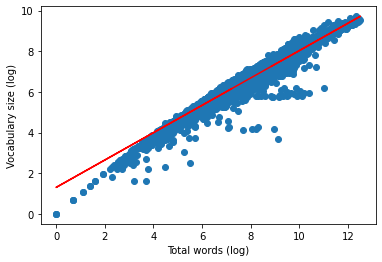

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
x=np.log(x)
y=np.log(y)
x=x.reshape(-1,1) #reshaping for fitting regression
y=y.reshape(-1,1)

from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x, y)
b=model.coef_
log_k=model.intercept_
yhat=model.predict(x)

#plotting the graph
#in logorithmic scale
plt.scatter(x,y)
plt.xlabel('Total words (log)')
plt.ylabel('Vocabulary size (log)')
plt.plot(x,yhat,color='r')

#For each of the documents selected in the corpus, we plot the total words vs vocabulary plot in log scale. 


In [ ]:
print("K ="+str(np.exp(log_k)))
print("Beta(b)="+str(b))

K =[3.74386832]
Beta(b)=[[0.6706541]]


# Information pertaining to the given corpus.

In [ ]:
vocabulary=set()  #entire vocabulary by taking the union over the partitons. 
os.chdir(save_location)
for m in range(k):
  with open("vocab-"+str(m), "rb") as f:
    
     vocab=pickle.load(f)
         
     
  vocabulary=vocabulary.union(vocab)

In [ ]:
#acciently took log of counts (heaps law) before doing the sum for the total word count, thats why np.exp is used
print(sum(sentences),"is the total number of sentences in the corpus\n")
print(int(sum(np.exp(x))),"is the total number of words in the corpus\n")
print(len(vocabulary),"is the total number of unique words in the corpus\n")

8109605 is the total number of sentences in the corpus

215835102 is the total number of words in the corpus

801851 is the total number of unique words in the corpus

